<a href="https://colab.research.google.com/github/JanechrisDataAnalyst/JanechrisDataAnalyst/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
np.random.seed(42)

#function for creating data points in form of a circle
def PointsInCircum(r, n=100):
  return[(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1, n+1)]

In [ ]:
# create data points in the form of a circle:
df = pd.DataFrame(PointsInCircum(500, 1000))
df = df.append(PointsInCircum(300, 700))
df = df.append(PointsInCircum(100, 300))

# Adding noise to the dataset:
df = df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

<ipython-input-3-c5f82a2b6101>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(PointsInCircum(300, 700))
<ipython-input-3-c5f82a2b6101>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(PointsInCircum(100, 300))
<ipython-input-3-c5f82a2b6101>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])


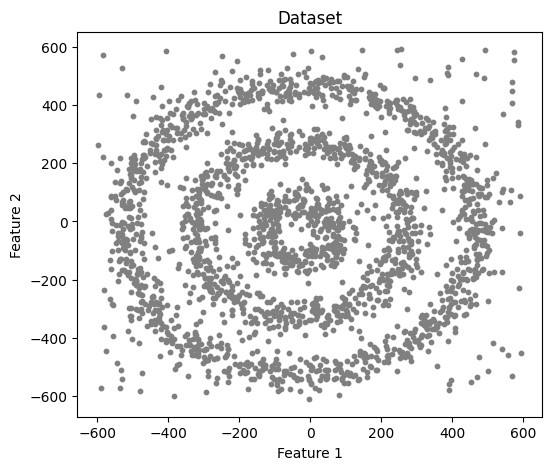

In [ ]:
plt.figure(figsize = (6,5))
plt.scatter(df[0], df[1], s=10, color="grey")
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show ()

# K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


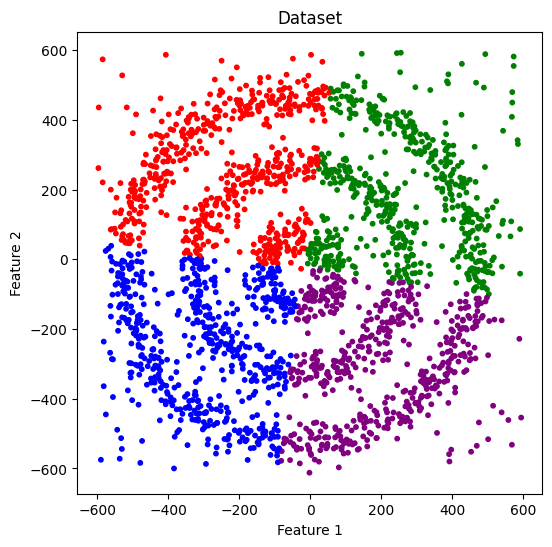

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(df[[0,1]])

df["KMeans_labels"] = kmeans.labels_

# plotting resulting clusters:
colors = [ "purple", "red", "blue", "green"]
plt.figure(figsize = (6,6))
plt.scatter(df[0], df[1], c = df["KMeans_labels"], cmap = matplotlib.colors.ListedColormap(colors), s=10)
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show ()

## DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

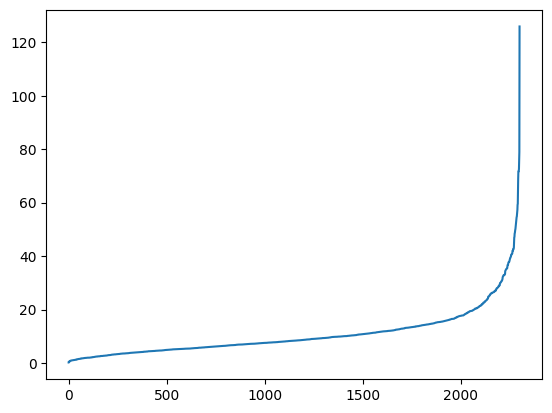

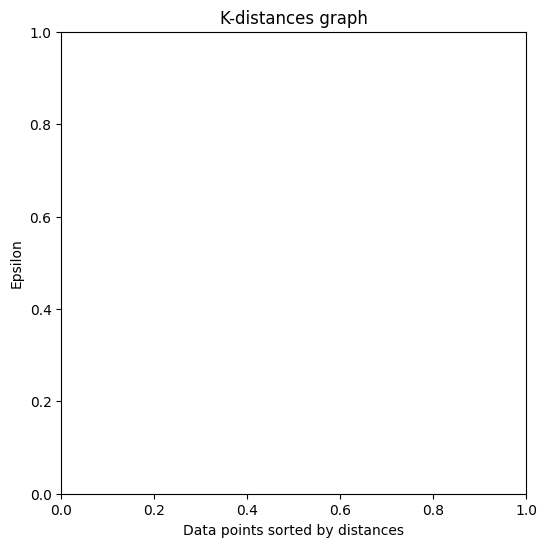

In [ ]:
# plot k-distance graph:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.figure(figsize = (6,6))
plt.title("K-distances graph")
plt.xlabel("Data points sorted by distances")
plt.ylabel("Epsilon")
plt.show()

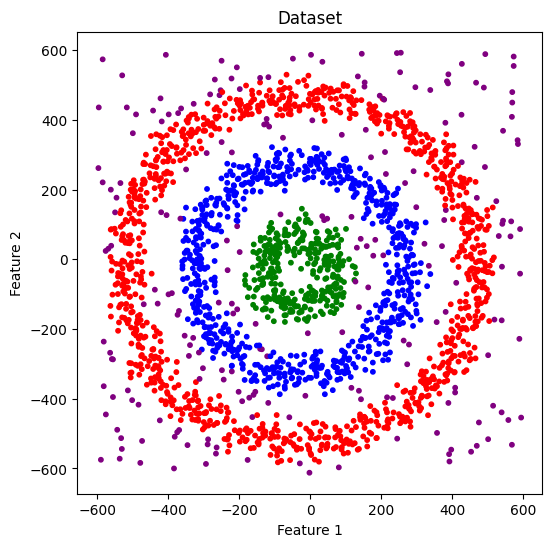

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 30, min_samples = 6)
dbscan.fit(df[[0,1]])

df["dbscan_labels"] = dbscan.labels_
df["dbscan_labels"].value_counts()
plt.figure(figsize = (6,6))
plt.scatter(df[0], df[1], c = df["dbscan_labels"], cmap = matplotlib.colors.ListedColormap(colors), s=10)
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show ()